In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## load the dataframes

In [4]:
incremental_df = pd.read_csv('data\\incremental_data.csv')
raw_df = pd.read_csv('data\\raw_data.csv')
raw_df = pd.DataFrame(raw_df)
inc_df = pd.DataFrame(incremental_df)

### inspect data

In [5]:
print("RAW DATA")
display(raw_df.info())
print("\nINCREMENTAL DATA")
display(inc_df.info())

RAW DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252202 entries, 0 to 252201
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    251934 non-null  float64
 1   Customer_ID       251950 non-null  float64
 2   Name              251890 non-null  object 
 3   Email             251903 non-null  object 
 4   Phone             251899 non-null  float64
 5   Address           251933 non-null  object 
 6   City              251994 non-null  object 
 7   State             251972 non-null  object 
 8   Zipcode           251918 non-null  float64
 9   Country           251980 non-null  object 
 10  Age               252051 non-null  float64
 11  Gender            251925 non-null  object 
 12  Income            251962 non-null  object 
 13  Customer_Segment  252029 non-null  object 
 14  Date              251900 non-null  object 
 15  Year              252202 non-null  float64
 16  Month      

None


INCREMENTAL DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49808 entries, 0 to 49807
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    49743 non-null  float64
 1   Customer_ID       49752 non-null  float64
 2   Name              49738 non-null  object 
 3   Email             49760 non-null  object 
 4   Phone             49749 non-null  float64
 5   Address           49762 non-null  object 
 6   City              49768 non-null  object 
 7   State             49757 non-null  object 
 8   Zipcode           49752 non-null  float64
 9   Country           49759 non-null  object 
 10  Age               49786 non-null  float64
 11  Gender            49768 non-null  object 
 12  Income            49758 non-null  object 
 13  Customer_Segment  49766 non-null  object 
 14  Date              49751 non-null  object 
 15  Year              49808 non-null  float64
 16  Month             4976

None

In [14]:
#checking the data types
#  dtypes
print("RAW BEFORE DTYPES ")
print(raw_df.dtypes)
print("INC BEFORE DTYPES ")
print(inc_df.dtypes)

RAW BEFORE DTYPES 
Transaction_ID               Int64
Customer_ID                  Int64
Name                        object
Email                       object
Phone                      float64
Address                     object
City                        object
State                       object
Zipcode                    float64
Country                     object
Age                        float64
Gender                      object
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Year                         Int64
Month                     category
Time                        object
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category            object
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                object
R

In [8]:
# raw_df convert types
raw_df['Date'] = pd.to_datetime(raw_df['Date'], errors='coerce')
raw_df['Transaction_ID'] = pd.to_numeric(raw_df['Transaction_ID'], errors='coerce').astype('Int64')
raw_df['Customer_ID'] = pd.to_numeric(raw_df['Customer_ID'], errors='coerce').astype('Int64')
raw_df['Year'] = pd.to_numeric(raw_df['Year'], errors='coerce').astype('Int64')
# numeric columns
for col in ['Phone','Zipcode','Age','Total_Purchases','Amount','Total_Amount','Ratings']:
    if col in raw_df.columns:
        raw_df[col] = pd.to_numeric(raw_df[col], errors='coerce')

# Month handling for raw_df
months_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
if 'Month' in raw_df.columns and raw_df['Month'].dtype == 'object':
    raw_df['Month'] = pd.Categorical(raw_df['Month'], categories=months_order, ordered=True)
elif 'Date' in raw_df.columns:
    raw_df['Month'] = raw_df['Date'].dt.strftime('%b')
    raw_df['Month'] = pd.Categorical(raw_df['Month'], categories=months_order, ordered=True)



In [9]:
# INC: convert types
inc_df['Date'] = pd.to_datetime(inc_df['Date'], errors='coerce')
inc_df['Transaction_ID'] = pd.to_numeric(inc_df['Transaction_ID'], errors='coerce').astype('Int64')
inc_df['Customer_ID'] = pd.to_numeric(inc_df['Customer_ID'], errors='coerce').astype('Int64')
inc_df['Year'] = pd.to_numeric(inc_df['Year'], errors='coerce').astype('Int64')
for col in ['Phone','Zipcode','Age','Total_Purchases','Amount','Total_Amount','Ratings']:
    if col in inc_df.columns:
        inc_df[col] = pd.to_numeric(inc_df[col], errors='coerce')

# Month handling for INC
if 'Month' in inc_df.columns and inc_df['Month'].dtype == 'object':
    inc_df['Month'] = pd.Categorical(inc_df['Month'], categories=months_order, ordered=True)
elif 'Date' in inc_df.columns:
    inc_df['Month'] = inc_df['Date'].dt.strftime('%b')
    inc_df['Month'] = pd.Categorical(inc_df['Month'], categories=months_order, ordered=True)

In [10]:
# AFTER: dtypes
print(" RAW AFTER DTYPES")
print(raw_df.dtypes)
print("\nINC AFTER DTYPES")
print(inc_df.dtypes)

 RAW AFTER DTYPES
Transaction_ID               Int64
Customer_ID                  Int64
Name                        object
Email                       object
Phone                      float64
Address                     object
City                        object
State                       object
Zipcode                    float64
Country                     object
Age                        float64
Gender                      object
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Year                         Int64
Month                     category
Time                        object
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category            object
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                object
Ra

## Missing values & duplicates

In [ ]:
# Cleaning the data
# Check for missing values
raw_missing_values = raw_df.isnull().sum()
incremental_missing_values = inc_df.isnull().sum()
print("Missing values in each column:\n", raw_missing_values)
print("Missing values in each column:\n", incremental_missing_values)

In [11]:
# raw_df duplicates / missing
print("RAW before rows:", len(raw_df))
before_dup = len(raw_df)
raw_df = raw_df.drop_duplicates()
print("RAW exact duplicates removed:", before_dup - len(raw_df))

before_missing = len(raw_df)
raw_df = raw_df[raw_df['Transaction_ID'].notna()]
print("RAW rows with missing Transaction_ID dropped:", before_missing - len(raw_df))
print("RAW after rows:", len(raw_df))

RAW before rows: 252202
RAW exact duplicates removed: 4
RAW rows with missing Transaction_ID dropped: 268
RAW after rows: 251930


In [12]:
# INC duplicates / missing
print("\nINC before rows:", len(inc_df))
before_dup = len(inc_df)
inc_df = inc_df.drop_duplicates()
print("INC exact duplicates removed:", before_dup - len(inc_df))

before_missing = len(inc_df)
inc_df = inc_df[inc_df['Transaction_ID'].notna()]
print("INC rows with missing Transaction_ID dropped:", before_missing - len(inc_df))
print("INC after rows:", len(inc_df))



INC before rows: 49808
INC exact duplicates removed: 0
INC rows with missing Transaction_ID dropped: 65
INC after rows: 49743


## Trim whitespace & normalize text columns

In [13]:
text_cols = ['Name','Email','Address','City','State','Country','Product_Category','Product_Brand','Product_Type','Customer_Segment']

# Show sample before
print("RAW sample City before:", raw_df['City'].head(5).tolist() if 'City' in raw_df.columns else None)
print("RAW sample Product_Category before:", raw_df['Product_Category'].head(5).tolist() if 'Product_Category' in raw_df.columns else None)

# RAW cleaning
for c in text_cols:
    if c in raw_df.columns:
        raw_df[c] = raw_df[c].astype(str).str.strip().replace({'nan': np.nan, 'None': np.nan})

# Title case for grouping fields (avoid email & name)
for c in ['City','State','Country','Product_Category','Product_Brand','Product_Type','Customer_Segment']:
    if c in raw_df.columns:
        raw_df[c] = raw_df[c].astype(str).str.title().replace({'Nan': np.nan, 'None': np.nan})

# INC cleaning
for c in text_cols:
    if c in inc_df.columns:
        inc_df[c] = inc_df[c].astype(str).str.strip().replace({'nan': np.nan, 'None': np.nan})
for c in ['City','State','Country','Product_Category','Product_Brand','Product_Type','Customer_Segment']:
    if c in inc_df.columns:
        inc_df[c] = inc_df[c].astype(str).str.title().replace({'Nan': np.nan, 'None': np.nan})

# Show sample after
print("\nRAW sample City after:", raw_df['City'].head(5).tolist() if 'City' in raw_df.columns else None)
print("RAW sample Product_Category after:", raw_df['Product_Category'].head(5).tolist() if 'Product_Category' in raw_df.columns else None)


RAW sample City before: ['Dortmund', 'Nottingham', 'Geelong', 'Edmonton', 'Brisbane']
RAW sample Product_Category before: ['Clothing', 'Electronics', 'Books', 'Home Decor', 'Electronics']

RAW sample City after: ['Dortmund', 'Nottingham', 'Geelong', 'Edmonton', 'Brisbane']
RAW sample Product_Category after: ['Clothing', 'Electronics', 'Books', 'Home Decor', 'Electronics']


## Clean currency-like text fields (Income, Amount)

In [15]:
# RAW Income before missing count
if 'Income' in raw_df.columns:
    print("RAW Income before non-numeric count:", raw_df['Income'].apply(lambda x: isinstance(x, str)).sum())

# RAW: clean Income
if 'Income' in raw_df.columns:
    raw_df['Income'] = raw_df['Income'].astype(str).str.replace(r'[\$,]', '', regex=True).str.replace(r'\s+', '', regex=True)
    raw_df['Income'] = raw_df['Income'].replace({'': np.nan, 'nan': np.nan})
    raw_df['Income'] = pd.to_numeric(raw_df['Income'], errors='coerce')

# RAW Amount and Total_Amount ensure numeric (in case they had symbols)
for col in ['Amount','Total_Amount']:
    if col in raw_df.columns:
        raw_df[col] = raw_df[col].astype(str).str.replace(r'[\$,]', '', regex=True).str.replace(r'\s+', '', regex=True)
        raw_df[col] = pd.to_numeric(raw_df[col].replace({'': np.nan}), errors='coerce')

# INC: same cleaning
if 'Income' in inc_df.columns:
    inc_df['Income'] = inc_df['Income'].astype(str).str.replace(r'[\$,]', '', regex=True).str.replace(r'\s+', '', regex=True)
    inc_df['Income'] = inc_df['Income'].replace({'': np.nan, 'nan': np.nan})
    inc_df['Income'] = pd.to_numeric(inc_df['Income'], errors='coerce')

for col in ['Amount','Total_Amount']:
    if col in inc_df.columns:
        inc_df[col] = inc_df[col].astype(str).str.replace(r'[\$,]', '', regex=True).str.replace(r'\s+', '', regex=True)
        inc_df[col] = pd.to_numeric(inc_df[col].replace({'': np.nan}), errors='coerce')

# AFTER: print some stats
if 'Income' in raw_df.columns:
    print("RAW Income nulls after cleaning:", raw_df['Income'].isna().sum())
if 'Amount' in raw_df.columns:
    print("RAW Amount nulls after cleaning:", raw_df['Amount'].isna().sum())

if 'Income' in inc_df.columns:
    print("INC Income nulls after cleaning:", inc_df['Income'].isna().sum())
if 'Amount' in inc_df.columns:
    print("INC Amount nulls after cleaning:", inc_df['Amount'].isna().sum())



RAW Income before non-numeric count: 251690
RAW Income nulls after cleaning: 251930
RAW Amount nulls after cleaning: 299
INC Income nulls after cleaning: 49743
INC Amount nulls after cleaning: 57


## Recompute Total_Amount and flag mismatches

In [16]:
# RAW recompute and mismatch check
if 'Amount' in raw_df.columns and 'Total_Purchases' in raw_df.columns:
    raw_df['Total_Amount_calc'] = raw_df['Amount'] * raw_df['Total_Purchases']
    if 'Total_Amount' in raw_df.columns:
        raw_df['Total_Amount_diff'] = (raw_df['Total_Amount'] - raw_df['Total_Amount_calc']).abs()
        mismatches_raw = raw_df['Total_Amount_diff'] > 1.0
        print("RAW Total_Amount mismatches (diff > 1):", mismatches_raw.sum())
    # Replace Total_Amount with calculated (consistent choice)
    raw_df['Total_Amount'] = raw_df['Total_Amount_calc']
    raw_df.drop(columns=['Total_Amount_calc','Total_Amount_diff'], errors='ignore', inplace=True)

# INC recompute and mismatch check
if 'Amount' in inc_df.columns and 'Total_Purchases' in inc_df.columns:
    inc_df['Total_Amount_calc'] = inc_df['Amount'] * inc_df['Total_Purchases']
    if 'Total_Amount' in inc_df.columns:
        inc_df['Total_Amount_diff'] = (inc_df['Total_Amount'] - inc_df['Total_Amount_calc']).abs()
        mismatches_inc = inc_df['Total_Amount_diff'] > 1.0
        print("INC Total_Amount mismatches (diff > 1):", mismatches_inc.sum())
    inc_df['Total_Amount'] = inc_df['Total_Amount_calc']
    inc_df.drop(columns=['Total_Amount_calc','Total_Amount_diff'], errors='ignore', inplace=True)


RAW Total_Amount mismatches (diff > 1): 0
INC Total_Amount mismatches (diff > 1): 0


## Handle missing values

In [17]:
# Show missing before for selected cols
cols_to_check = ['Name','Email','Phone','Age','Gender','Customer_Segment','Ratings']
print("RAW missing before:")
print(raw_df[cols_to_check].isna().sum())
print("\nINC missing before:")
print(inc_df[cols_to_check].isna().sum())

RAW missing before:
Name                312
Email               298
Phone               302
Age                 151
Gender              276
Customer_Segment    173
Ratings             147
dtype: int64

INC missing before:
Name                70
Email               48
Phone               59
Age                 22
Gender              40
Customer_Segment    42
Ratings             37
dtype: int64


In [18]:
# RAW imputation choices
# Age: fill with median and flag
if 'Age' in raw_df.columns:
    raw_df['Age_filled_flag'] = raw_df['Age'].isna()
    age_median = int(raw_df['Age'].median(skipna=True))
    raw_df['Age'] = raw_df['Age'].fillna(age_median)

# Gender and segments
if 'Gender' in raw_df.columns:
    raw_df['Gender'] = raw_df['Gender'].fillna('Unknown')
if 'Customer_Segment' in raw_df.columns:
    raw_df['Customer_Segment'] = raw_df['Customer_Segment'].fillna('Uncategorized')

# Contact fields: keep NaN but create fallback filled columns
for col in ['Name','Email','Phone','Address']:
    if col in raw_df.columns:
        raw_df[col + '_filled'] = raw_df[col].fillna('Unknown')

# Ratings: keep NaN, but optionally fill median and flag (here we keep NaN to be honest)
if 'Ratings' in raw_df.columns:
    raw_df['Ratings_missing'] = raw_df['Ratings'].isna()

In [19]:
# INC imputation choices
if 'Age' in inc_df.columns:
    inc_df['Age_filled_flag'] = inc_df['Age'].isna()
    age_median_inc = int(inc_df['Age'].median(skipna=True))
    inc_df['Age'] = inc_df['Age'].fillna(age_median_inc)

if 'Gender' in inc_df.columns:
    inc_df['Gender'] = inc_df['Gender'].fillna('Unknown')
if 'Customer_Segment' in inc_df.columns:
    inc_df['Customer_Segment'] = inc_df['Customer_Segment'].fillna('Uncategorized')

for col in ['Name','Email','Phone','Address']:
    if col in inc_df.columns:
        inc_df[col + '_filled'] = inc_df[col].fillna('Unknown')

if 'Ratings' in inc_df.columns:
    inc_df['Ratings_missing'] = inc_df['Ratings'].isna()

# Show missing after
print("\nRAW missing after:")
print(raw_df[cols_to_check].isna().sum())
print("\nINC missing after:")
print(inc_df[cols_to_check].isna().sum())




RAW missing after:
Name                312
Email               298
Phone               302
Age                   0
Gender                0
Customer_Segment      0
Ratings             147
dtype: int64

INC missing after:
Name                70
Email               48
Phone               59
Age                  0
Gender               0
Customer_Segment     0
Ratings             37
dtype: int64


## Enrichment / Categorization

In [24]:
# RAW enrichment
if 'Total_Amount' in raw_df.columns:
    bins = [0,100,500,1000,5000, np.inf]
    labels = ['Low','Medium','High','Premium','Elite']
    raw_df['Sales_Tier'] = pd.cut(raw_df['Total_Amount'], bins=bins, labels=labels)
if 'Age' in raw_df.columns:
    bins_age = [0,18,30,45,60,100]
    labels_age = ['Child','YoungAdult','Adult','MidAge','Senior']
    raw_df['Age_Group'] = pd.cut(raw_df['Age'], bins=bins_age, labels=labels_age)
if 'Total_Amount' in raw_df.columns:
    raw_df['Is_High_Value'] = raw_df['Total_Amount'] > raw_df['Total_Amount'].quantile(0.90)


In [25]:
# INC enrichment
if 'Total_Amount' in inc_df.columns:
    bins = [0,100,500,1000,5000, np.inf]
    labels = ['Low','Medium','High','Premium','Elite']
    inc_df['Sales_Tier'] = pd.cut(inc_df['Total_Amount'], bins=bins, labels=labels)
if 'Age' in inc_df.columns:
    bins_age = [0,18,30,45,60,100]
    labels_age = ['Child','YoungAdult','Adult','MidAge','Senior']
    inc_df['Age_Group'] = pd.cut(inc_df['Age'], bins=bins_age, labels=labels_age)
if 'Total_Amount' in inc_df.columns:
    inc_df['Is_High_Value'] = inc_df['Total_Amount'] > inc_df['Total_Amount'].quantile(0.90)

# Show counts
if 'Sales_Tier' in raw_df.columns:
    print("RAW Sales_Tier counts:")
    display(raw_df['Sales_Tier'].value_counts(dropna=False))
if 'Sales_Tier' in inc_df.columns:
    print("INC Sales_Tier counts:")
    display(inc_df['Sales_Tier'].value_counts(dropna=False))


RAW Sales_Tier counts:


Sales_Tier
Premium    128818
Medium      62137
High        50005
Low         10362
NaN           608
Elite           0
Name: count, dtype: int64

INC Sales_Tier counts:


Sales_Tier
Premium    25427
Medium     12291
High        9931
Low         1985
NaN          109
Elite          0
Name: count, dtype: int64

## Final checks & save transformed files

In [22]:
# Quick nulls top 10 for RAW and INC
print("RAW null counts (top 10):")
display(raw_df.isna().sum().sort_values(ascending=False).head(10))

print("\nINC null counts (top 10):")
display(inc_df.isna().sum().sort_values(ascending=False).head(10))

# Save transformed data
#raw_df.to_csv('transformed/transformed_full.csv', index=False)
#inc_df.to_csv('transformed/transformed_incremental.csv', index=False)
#print("Saved transformed/transformed_full.csv and transformed/transformed_incremental.csv")


RAW null counts (top 10):


Income             251930
Month              225180
Sales_Tier            608
Total_Amount          608
Name                  312
Total_Purchases       309
Phone                 302
Date                  302
Amount                299
Email                 298
dtype: int64


INC null counts (top 10):


Income          49743
Month           48189
Sales_Tier        109
Total_Amount      109
Name               70
Phone              59
Time               59
Date               57
Amount             57
Zipcode            56
dtype: int64

## Visualisations

Bar chart for top 10 categories by Total Revenue 

displays the top sellers

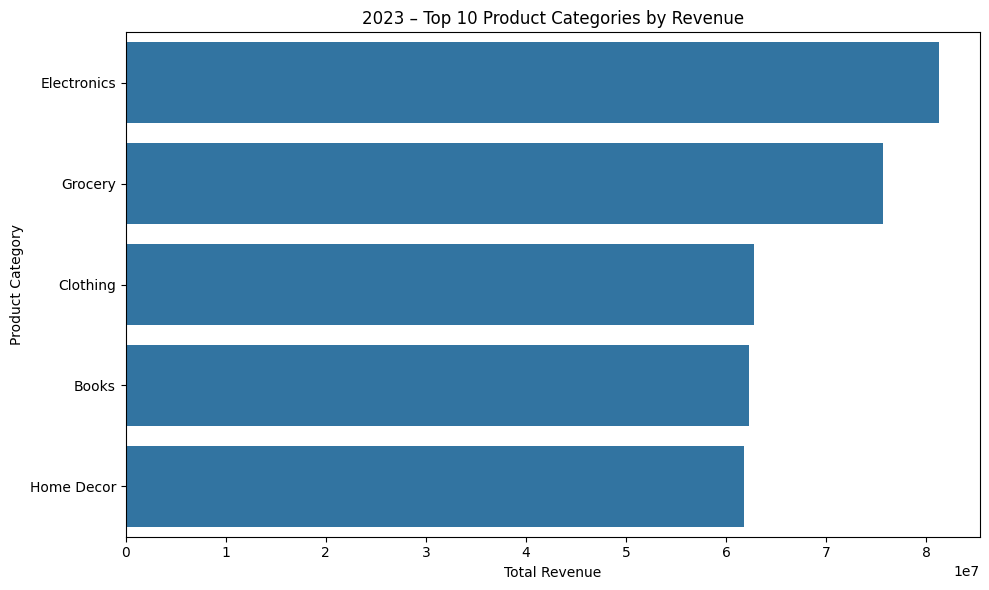

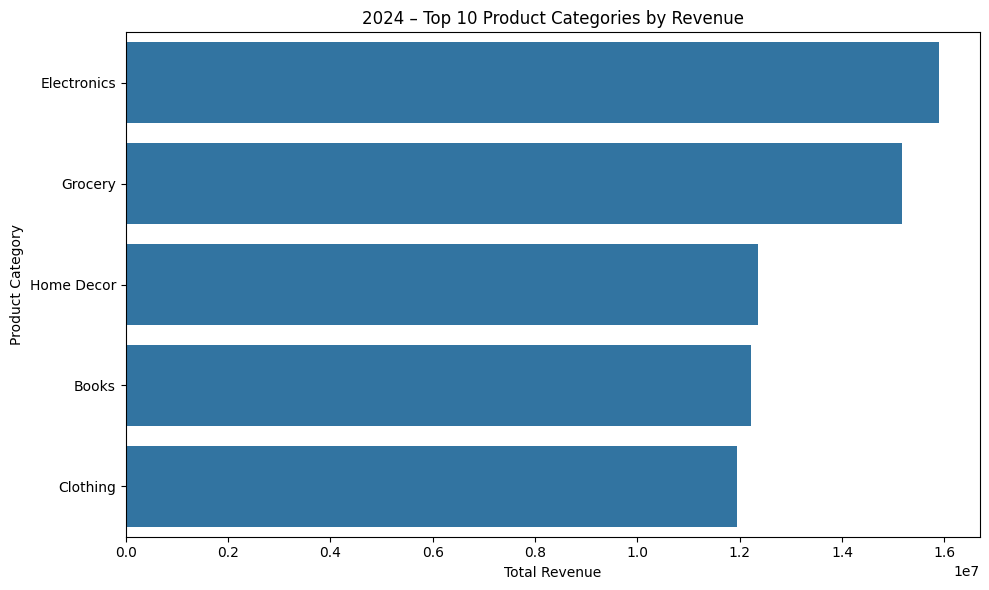

In [29]:
plt.figure(figsize=(10,6))
top_raw = raw_df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_raw.values, y=top_raw.index)
plt.title('2023 – Top 10 Product Categories by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
top_inc = inc_df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_inc.values, y=top_inc.index)
plt.title('2024 – Top 10 Product Categories by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

Boxplot ; Ratings by Product Category

Quality perception

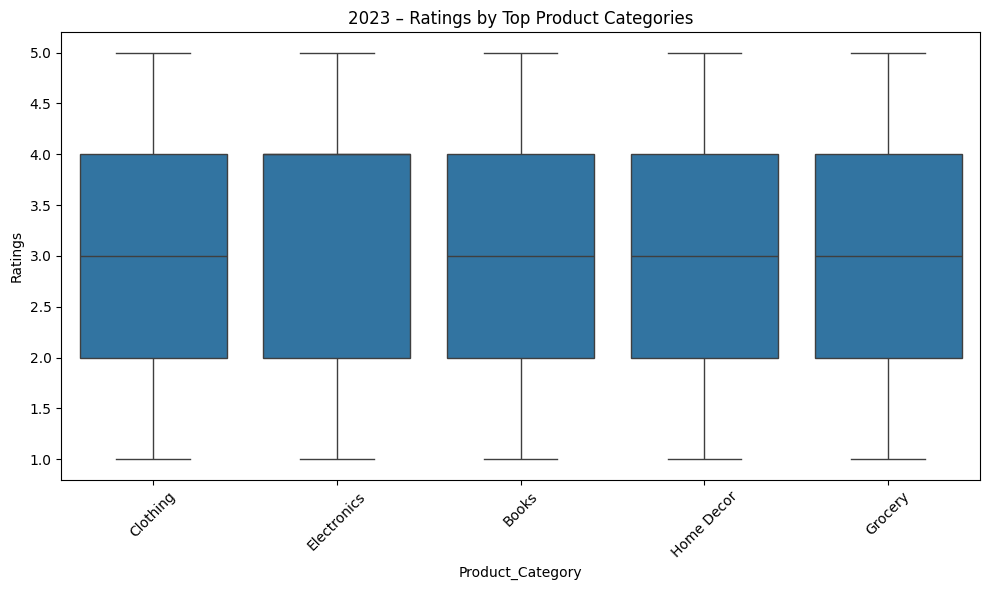

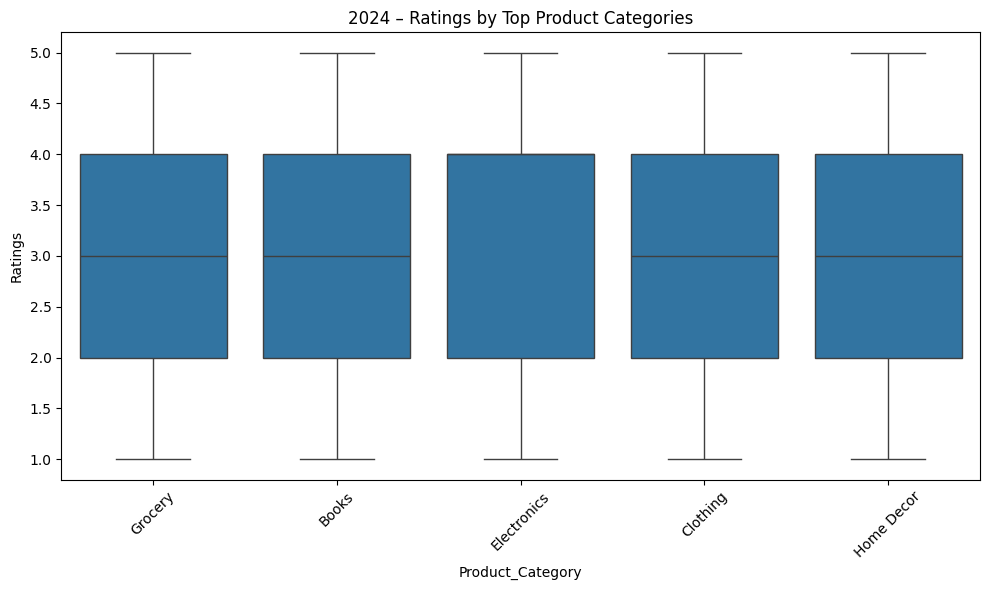

In [30]:
top_cats = raw_df['Product_Category'].value_counts().head(6).index
plt.figure(figsize=(10,6))
sns.boxplot(x='Product_Category', y='Ratings', data=raw_df[raw_df['Product_Category'].isin(top_cats)])
plt.title('2023 – Ratings by Top Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Product_Category', y='Ratings', data=inc_df[inc_df['Product_Category'].isin(top_cats)])
plt.title('2024 – Ratings by Top Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Histogram; Distribution of Customer Ages

shows customers demographics

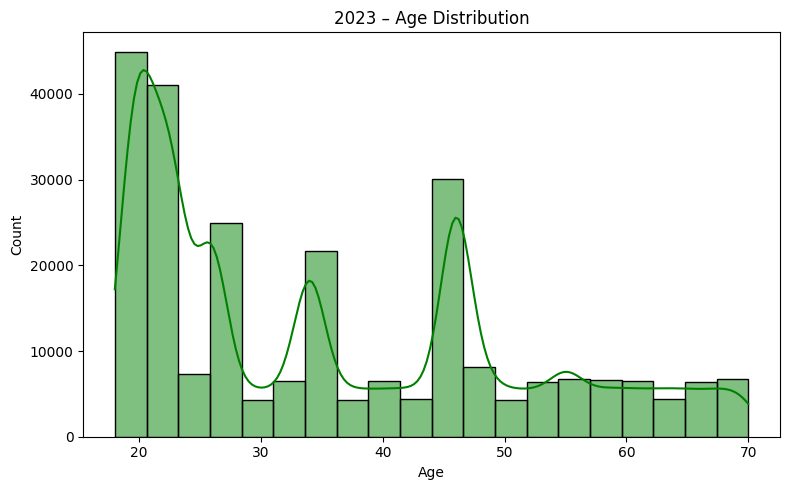

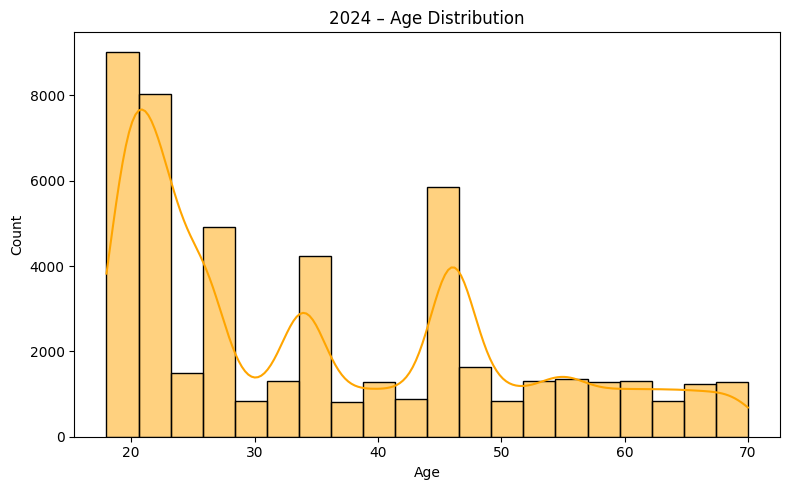

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(raw_df['Age'], bins=20, kde=True, color='green')
plt.title('2023 – Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(inc_df['Age'], bins=20, kde=True, color='orange')
plt.title('2024 – Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Line Plot; Monthly Sales Trend

shows time trends

C:\Users\Bradl\AppData\Local\Temp\ipykernel_26320\3534505705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_month = raw_df.groupby('Month')['Total_Amount'].sum().reindex(


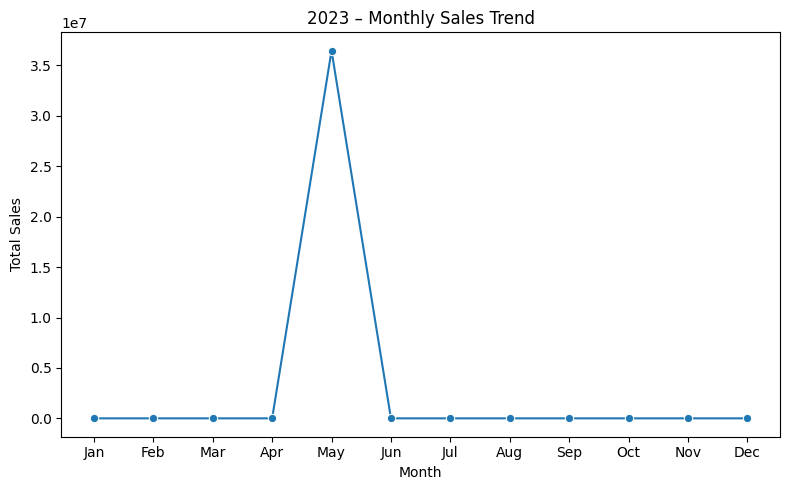

C:\Users\Bradl\AppData\Local\Temp\ipykernel_26320\3534505705.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inc_month = inc_df.groupby('Month')['Total_Amount'].sum().reindex(


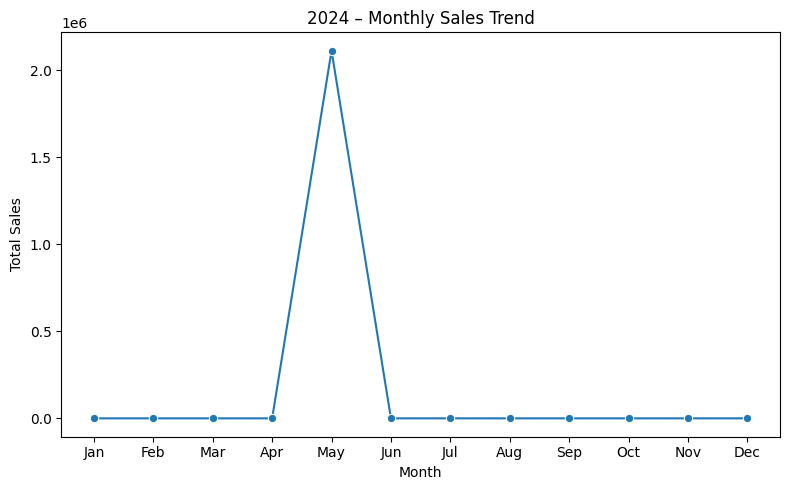

In [32]:
raw_month = raw_df.groupby('Month')['Total_Amount'].sum().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).fillna(0)
plt.figure(figsize=(8,5))
sns.lineplot(x=raw_month.index, y=raw_month.values, marker='o')
plt.title('2023 – Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

inc_month = inc_df.groupby('Month')['Total_Amount'].sum().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).fillna(0)
plt.figure(figsize=(8,5))
sns.lineplot(x=inc_month.index, y=inc_month.values, marker='o')
plt.title('2024 – Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


Pie Chart; Sales Share by Shipping Method

Shows customers logistics preferences

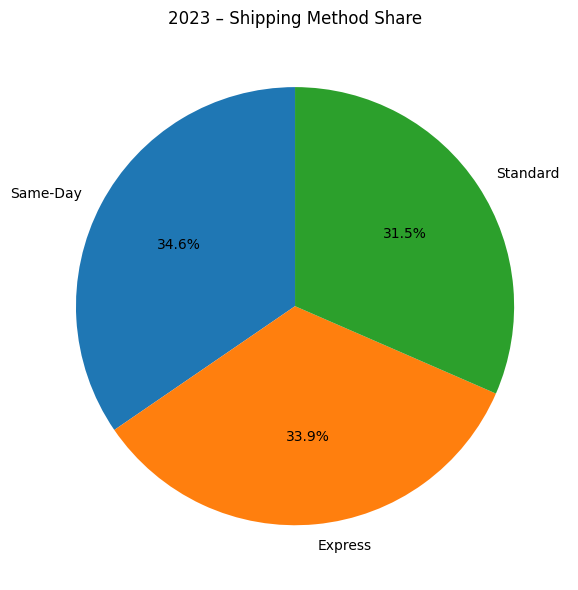

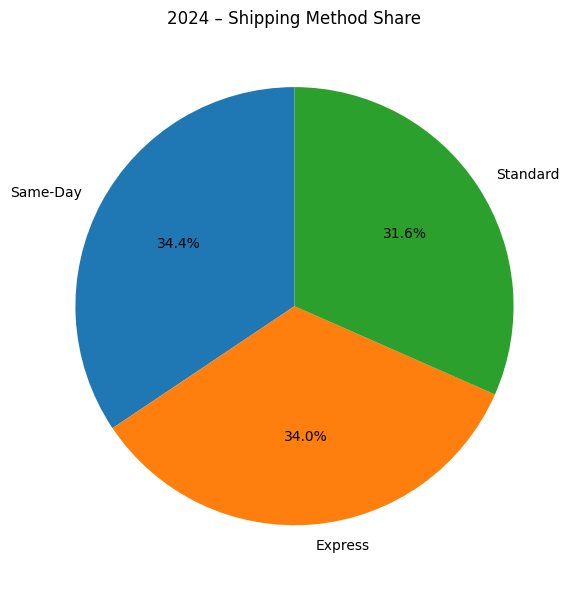

In [34]:
plt.figure(figsize=(6,6))
raw_df['Shipping_Method'].value_counts().head(6).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('2023 – Shipping Method Share')
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
inc_df['Shipping_Method'].value_counts().head(6).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('2024 – Shipping Method Share')
plt.ylabel('')
plt.tight_layout()
plt.show()

Bar Chart; Average Rating by Payment Method

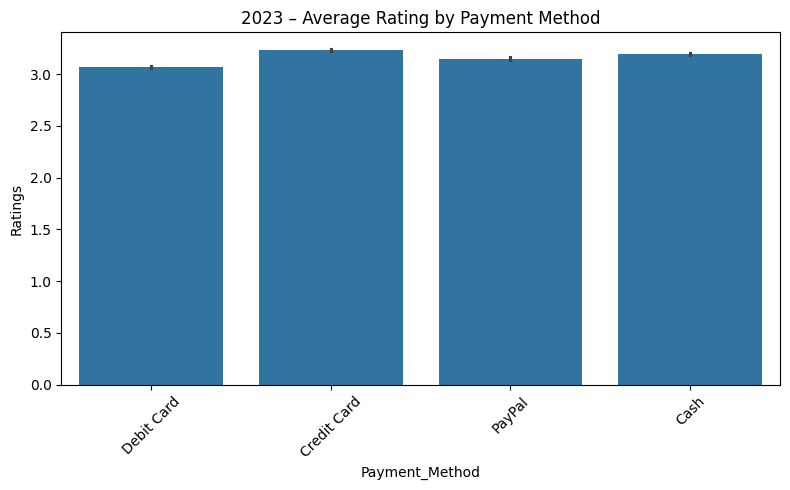

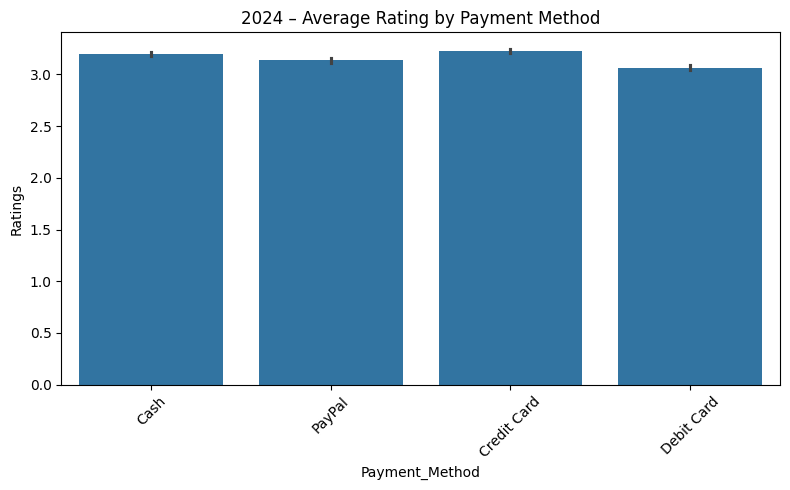

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='Payment_Method', y='Ratings', data=raw_df, estimator='mean')
plt.title('2023 – Average Rating by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Payment_Method', y='Ratings', data=inc_df, estimator='mean')
plt.title('2024 – Average Rating by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Heatmap; Correlation between Numeric Variables

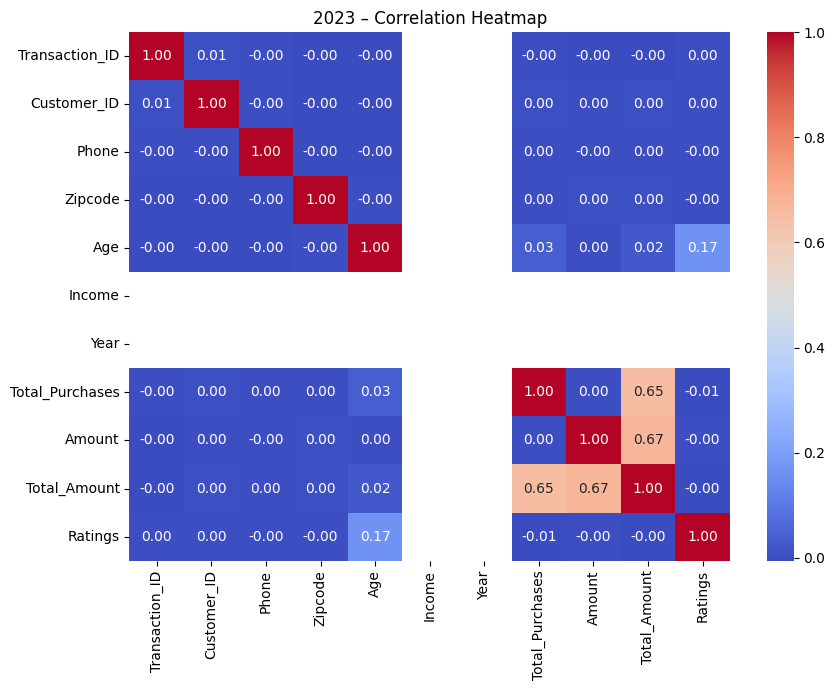

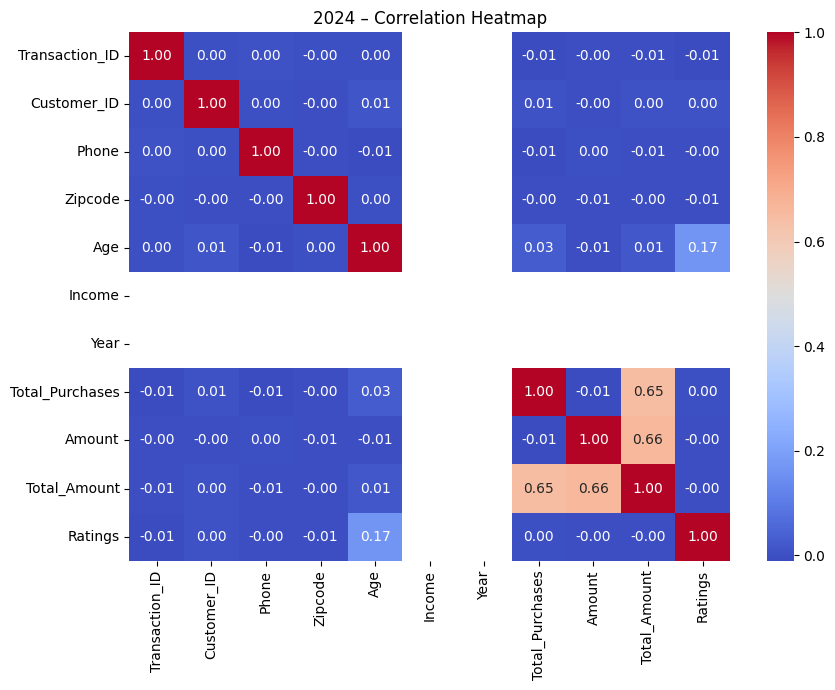

In [36]:
plt.figure(figsize=(9,7))
sns.heatmap(raw_df.select_dtypes('number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('2023 – Correlation Heatmap')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,7))
sns.heatmap(inc_df.select_dtypes('number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('2024 – Correlation Heatmap')
plt.tight_layout()
plt.show()

Count Plot;Orders by Customer Segment

shows market segmentations 

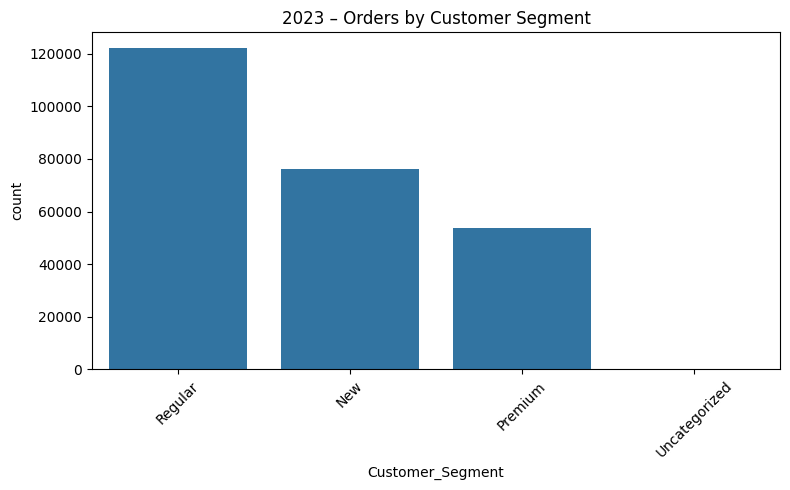

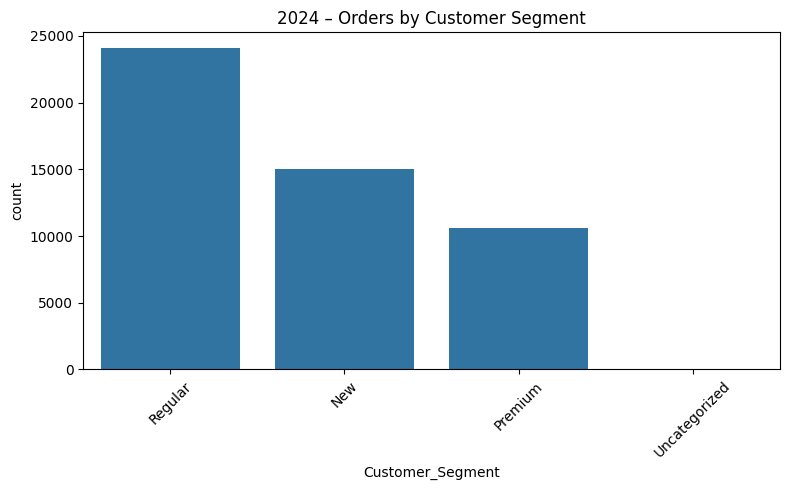

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='Customer_Segment', data=raw_df, order=raw_df['Customer_Segment'].value_counts().index)
plt.title('2023 – Orders by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Customer_Segment', data=inc_df, order=inc_df['Customer_Segment'].value_counts().index)
plt.title('2024 – Orders by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Histogram; Distribution of Total Amount (Sales)

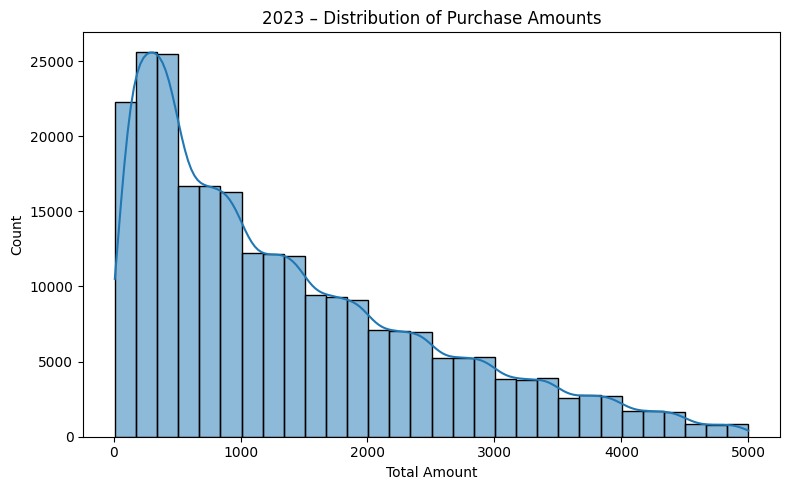

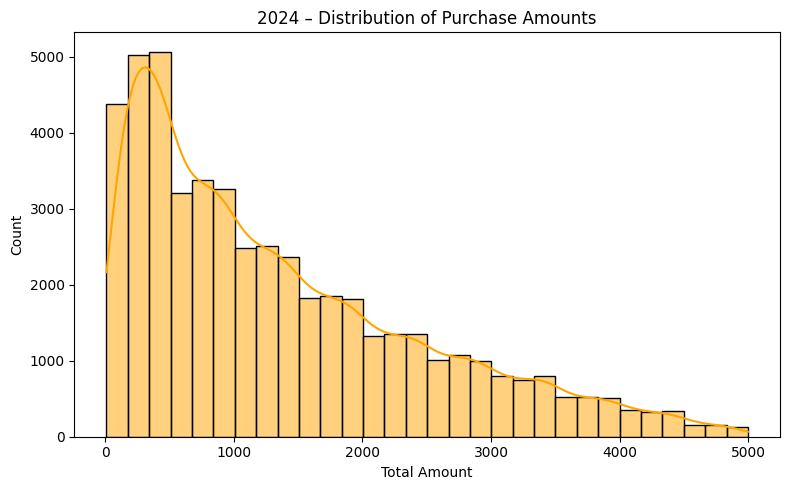

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(raw_df['Total_Amount'], bins=30, kde=True)
plt.title('2023 – Distribution of Purchase Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(inc_df['Total_Amount'], bins=30, kde=True, color='orange')
plt.title('2024 – Distribution of Purchase Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Bar Chart; Average Total_Amount by Gender

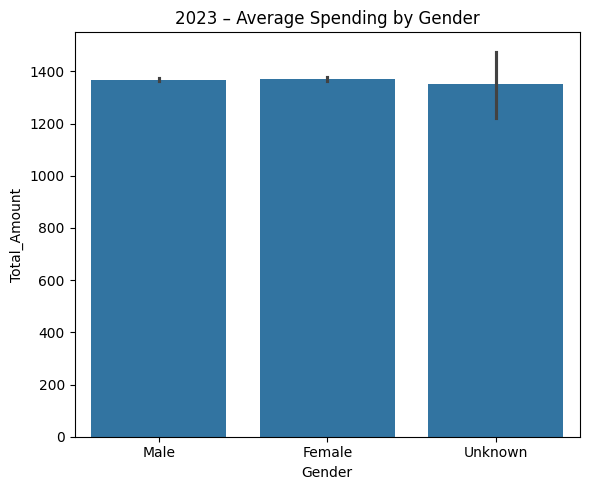

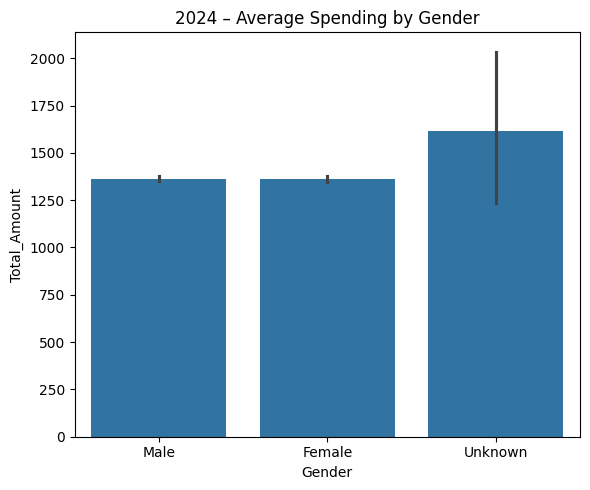

In [40]:
plt.figure(figsize=(6,5))
sns.barplot(x='Gender', y='Total_Amount', data=raw_df, estimator='mean')
plt.title('2023 – Average Spending by Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.barplot(x='Gender', y='Total_Amount', data=inc_df, estimator='mean')
plt.title('2024 – Average Spending by Gender')
plt.tight_layout()
plt.show()
